In [36]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [37]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [38]:
# sparsification
sparse = True
mode = "optim"
subset_size = 0.02
sparse_dict = {0.1: "log_sparse_0_1", 0.02: "log_sparse_0_02", 0.3: "log_sparse_0_3"}

if sparse:
    # directory where to save stuff
    in_dir = f"./sparse/{mode}/{sparse_dict[subset_size]}"

    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800]


# optimizer type
optimizers = ["L-BFGS-B", "TNC", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
list_f_vals = [1, 5, 20, 50]

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [39]:
data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [40]:
data.head(5)

,f,d,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,median_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,1,200,L-BFGS-B,"[3.856207, 3.5332627, 4.436898, 4.0992255, 1.9...","[2.550672, 2.6054535, 2.8176827, 2.6337652, 2....","[0.77418256, 0.69795746, 0.74131995, 0.7142833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3.8442597,3.9673398,6.2022247,1.8745803,0.0,0.0,0.0
1,1,200,TNC,"[1.60573, 2.2800517, 3.0694816, 1.5409939, 2.8...","[2.046888, 2.3481102, 2.4171505, 2.044425, 2.4...","[0.74482465, 0.7355636, 0.7422011, 0.7749031, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9335, 0.0, 0....",2.2453263,2.2394338,4.373769,0.04095315,0.09335,0.9335,0.0
2,1,200,SLSQP,"[0.124142304, 4.500407, 4.7655945, 3.0106382, ...","[0.60208654, 2.9092407, 2.9304185, 2.4245672, ...","[0.85993487, 0.7125003, 0.7785572, 0.74961895,...","[0.99969995, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",3.648199,4.1914206,5.303048,0.124142304,0.09997,0.99969995,0.0
3,1,400,L-BFGS-B,"[4.606119, 5.203702, 8.977945, 15.103311, 3.36...","[2.7643738, 2.9566927, 3.6430929, 4.466877, 2....","[0.69423234, 0.69998974, 0.6277235, 0.65603083...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",7.629564,6.459368,15.103311,3.364518,0.0,0.0,0.0
4,1,400,TNC,"[4.7542048, 5.385599, 5.38576, 0.040207773, 5....","[2.8743944, 3.036541, 3.042109, 0.7380263, 2.9...","[0.69076097, 0.7236794, 0.7260483, 0.14538376,...","[0.0, 0.0, 0.0, 0.93149996, 0.0, 0.0, 0.9928, ...",4.654,5.012423,11.10552,0.026352398,0.19243,0.9928,0.0


Text(0, 0.5, 'MSE')

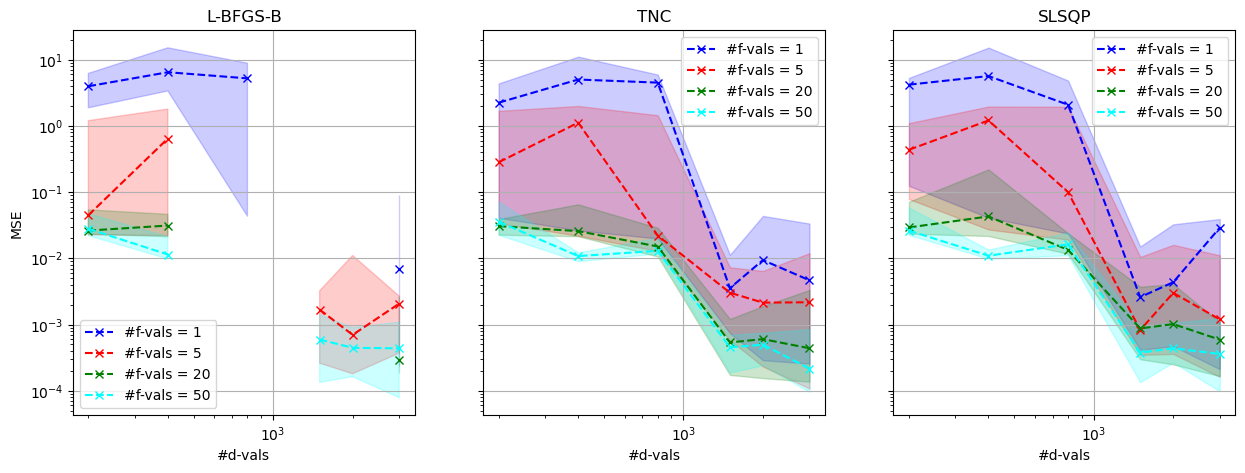

In [41]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        # mean_mse = temp["mean_mse"]
        median_mse = temp["median_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[i].set_yscale("log")
        ax[i].set_xscale("log")


    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("#d-vals")
    ax[i].set_title(optimizer)

ax[0].set_ylabel("MSE")

Text(0, 0.5, '% Y inside conf.-interval')

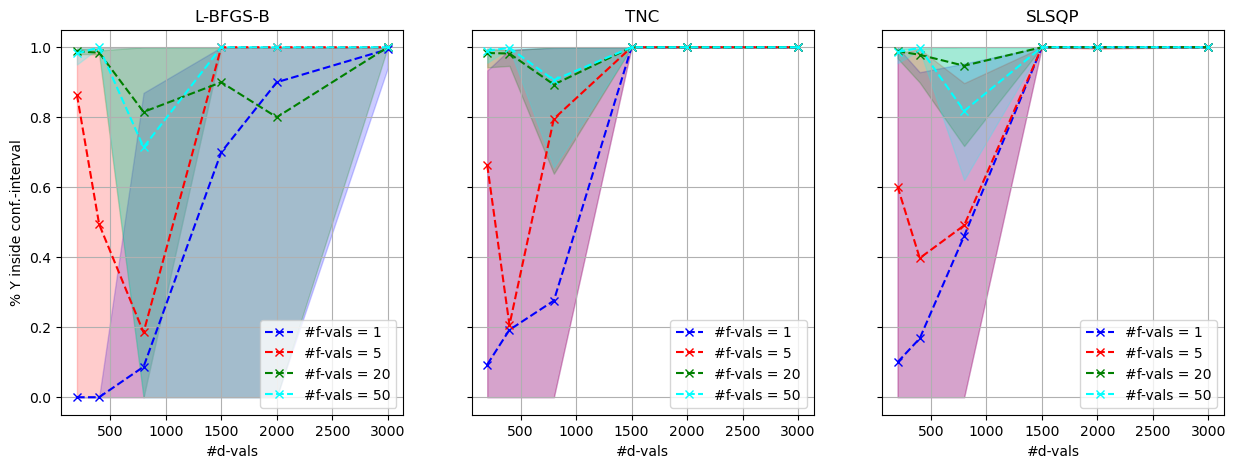

In [42]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        mean_tic = temp["mean_tic"]
        min_tic = temp["min_tic"]
        max_tic = temp["max_tic"]
        ax[i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("#d-vals")
    ax[i].set_title(optimizer)
ax[0].set_ylabel("% Y inside conf.-interval")

## Comparison between different sparsifications

Text(0.5, 0.98, 'MSE over training set size for different sparsification')

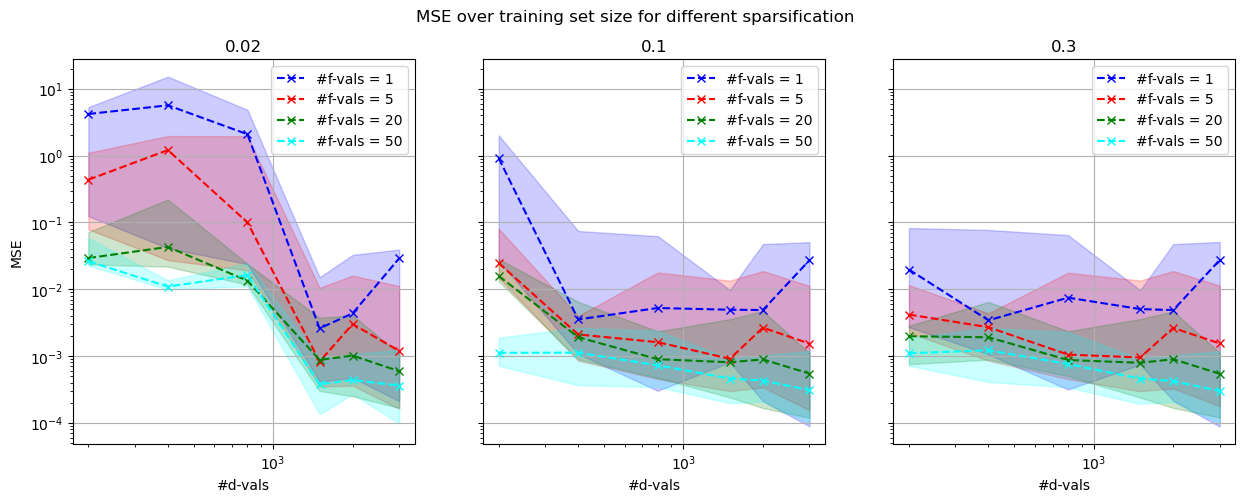

In [48]:
colors = ["b", "r", "g", "cyan"]

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sparse_list = [0.02, 0.1, 0.3]
optimizers = ["SLSQP"]

for i, sparse in enumerate(sparse_list):
    in_dir = f"./sparse/{mode}/{sparse_dict[sparse]}"
    data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, True, sparse, fun, eval_grid)
    opt_data = data[data["opt"] == optimizers[0]]
    for c,f in zip(colors, opt_data["f"].unique()):
        temp = opt_data[opt_data["f"] == f]
        dvals = temp["d"]

        # mean_mse = temp["mean_mse"]
        median_mse = temp["median_mse"]
        min_mse = temp["min_mse"]
        max_mse = temp["max_mse"]
        # ax[i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].plot(dvals, median_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
        ax[i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
        ax[i].set_yscale("log")
        ax[i].set_xscale("log")


    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel("#d-vals")
    ax[i].set_title(sparse)

ax[0].set_ylabel("MSE")
fig.suptitle("MSE over training set size for different sparsification")